# 캐글 San Francisco Crime Classification

SF OpenData에서는 샌프란시스코 도시에 대한 다양한 정보(부동산, 에너지, 교통, 헬스케어 등)를 공개하고 있습니다. 이 중에서, 우리는 2003년부터 2015년도까지 샌프란시스코에서 발생한 범죄 데이터를 확보합니다. 이 데이터를 활용해, 우리는 특정 위치와 특정 시간에 발생한 범죄의 구체적인 종류(ex: 절도, 살인, 뺑소니 등)를 맞추는 경진대회입니다.

# EDA

### -Load Dataset

In [2]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
train = pd.read_csv('train.csv')
print(train.shape)
train.head()

(878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


## 이번 캐글?? 특정 위치, 주소를 활용해 특정 시간, 관할 경찰서에서 발생한 범죄가 어떤 범죄일까??

### -컬럼설명

- **PdDistrict** : 관할 경찰서
- **Category** : 범죄 카테고리
- **Address** : 주소 - 미국에서 살아봤다면? 즉 도메인 지식이 있다면 분석에 도움이 된다.
- **X** : 범죄가 발생한 경도(Longitude)
- **Y** : 범죄가 발생한 위도(Latitude)


- **Descript** : 범죄에 대한 부가 설명(train 데이터만 존재하는 컬럼)
- **Resolution** : 범죄 해결? 진행?(train 데이터만 존재하는 컬럼)


### -Dates

In [4]:
train["Dates"] = pd.to_datetime(train["Dates"])

In [5]:
train["Dates-year"] = train["Dates"].dt.year
train["Dates-month"] = train["Dates"].dt.month
train["Dates-day"] = train["Dates"].dt.day
train["Dates-hour"] = train["Dates"].dt.hour
train["Dates-minute"] = train["Dates"].dt.minute
train["Dates-second"] = train["Dates"].dt.second

In [6]:
train[["Dates", "Dates-year", "Dates-month", "Dates-day", "Dates-hour", "Dates-minute", "Dates-second"]].head()

,Dates,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
0,2015-05-13 23:53:00,2015,5,13,23,53,0
1,2015-05-13 23:53:00,2015,5,13,23,53,0
2,2015-05-13 23:33:00,2015,5,13,23,33,0
3,2015-05-13 23:30:00,2015,5,13,23,30,0
4,2015-05-13 23:30:00,2015,5,13,23,30,0


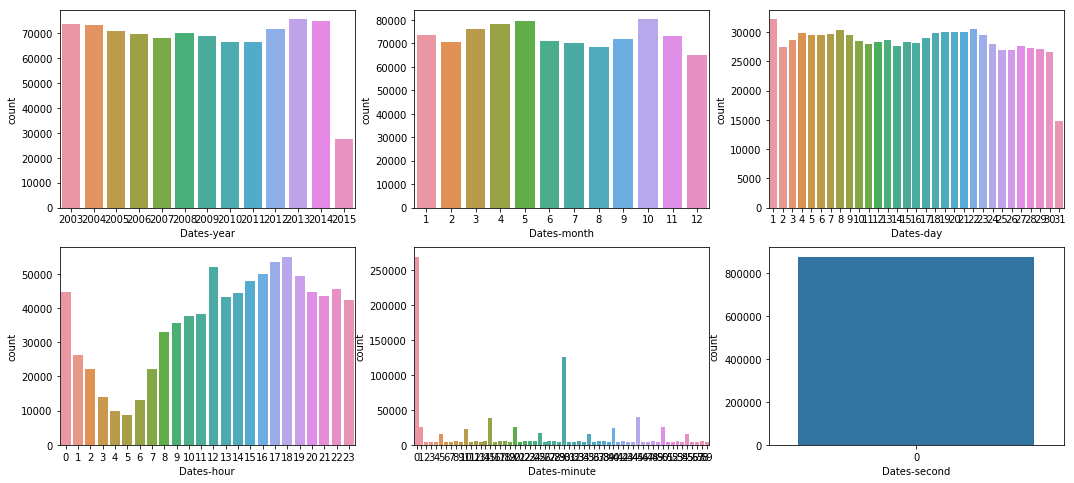

In [7]:
# matplotlib의 subplots를 사용합니다. 이 함수는 여러 개의 시각화를 한 화면에 띄울 수 있도록 합니다.
# 이번에는 2x3으로 총 6개의 시각화를 한 화면에 띄웁니다.
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)

# 사이즈 설정
figure.set_size_inches(18, 8)
#시각화
sns.countplot(data=train, x="Dates-year", ax=ax1)
sns.countplot(data=train, x="Dates-month", ax=ax2)
sns.countplot(data=train, x="Dates-day", ax=ax3)
sns.countplot(data=train, x="Dates-hour", ax=ax4)
sns.countplot(data=train, x="Dates-minute", ax=ax5)
sns.countplot(data=train, x="Dates-second", ax=ax6)

### -X, Y 좌표

In [8]:
train[["X","Y"]].head()

,X,Y
0,-122.425892,37.774599
1,-122.425892,37.774599
2,-122.424363,37.800414
3,-122.426995,37.800873
4,-122.438738,37.771541


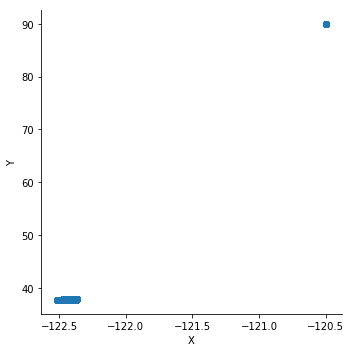

In [9]:
#lmplot 좌표 데이터 표현할때 사용
# fit_reg <- 추세선, 좌표 데이터 양이 너무 많기 때문에 추세선을 그리지 않는다. 
sns.lmplot(data=train, x='X', y='Y', fit_reg=False)

- __시각화해보니 오른쪽 상위에 이상값이 보이는 것 같다__

In [10]:
X_outlier = (train["X"] == train["X"].max())
Y_outlier = (train["Y"] == train["Y"].max())

outlier = train[X_outlier & Y_outlier]

print(outlier.shape)
outlier

(67, 15)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
660485,2005-12-30 17:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,TENDERLOIN,NONE,5THSTNORTH ST / OFARRELL ST,-120.5,90.0,2005,12,30,17,0,0
660711,2005-12-30 00:34:00,ASSAULT,INFLICT INJURY ON COHABITEE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0,2005,12,30,0,34,0
660712,2005-12-30 00:34:00,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0,2005,12,30,0,34,0
661106,2005-12-29 00:07:00,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Thursday,TENDERLOIN,PSYCHOPATHIC CASE,5THSTNORTH ST / EDDY ST,-120.5,90.0,2005,12,29,0,7,0
666430,2005-11-30 11:25:00,OTHER OFFENSES,TRAFFIC VIOLATION,Wednesday,TENDERLOIN,"ARREST, CITED",5THSTNORTH ST / ELLIS ST,-120.5,90.0,2005,11,30,11,25,0
667042,2005-11-28 16:04:00,TRESPASS,TRESPASSING,Monday,TENDERLOIN,"ARREST, BOOKED",ELLIS ST / 5THSTNORTH ST,-120.5,90.0,2005,11,28,16,4,0
669946,2005-11-14 09:20:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Monday,BAYVIEW,"ARREST, BOOKED",YOSEMITE AV / WILLIAMS AV,-120.5,90.0,2005,11,14,9,20,0
671709,2005-11-02 20:30:00,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Wednesday,CENTRAL,NONE,BRENHAM PL / WASHINGTON ST,-120.5,90.0,2005,11,2,20,30,0
673078,2005-10-23 20:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,RICHMOND,NONE,AVENUE OF THE PALMS / GEARY BL,-120.5,90.0,2005,10,23,20,0,0
673114,2005-10-23 18:11:00,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Sunday,TARAVAL,"ARREST, BOOKED",STCHARLES AV / 19TH AV,-120.5,90.0,2005,10,23,18,11,0


- __X, Y 좌표가 같은데도 주소가 다른 경우가 있다??__
- __이상한 값을 빼고 시각화를 시도__

In [11]:
non_outliers = train[~(X_outlier & Y_outlier)]

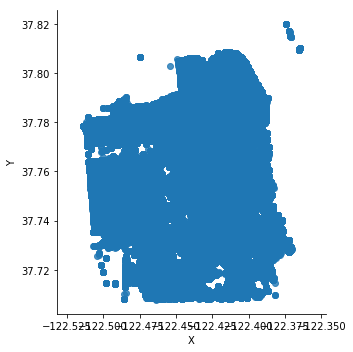

In [12]:
sns.lmplot(data=non_outliers, x='X', y='Y', fit_reg=False)

이상한 값을 빼고 시각화를 시도해보니 지도처럼 나온 것을 확인할 수 있었다.

동떨어진 값은 무슨 값인지??

표현된 값들은 지도랑 비슷한가??

### -DayOfWeek

1. 주중일 때와 주말일 때 차이??
2. 요일마다 더 많은 범죄가 있을 것 같다?

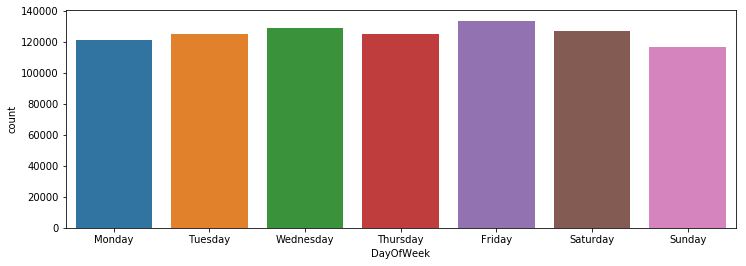

In [13]:
plt.figure(figsize = (12, 4))
dayofweek_list = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
#seaborn에서는 요일 정렬이 되지 않기 때문에 지정해준다.
sns.countplot(data = train, x = "DayOfWeek", order = dayofweek_list)

- 요일마다 차이는 없는 것 같다. 그렇다면 범죄 종류별로 알아보자

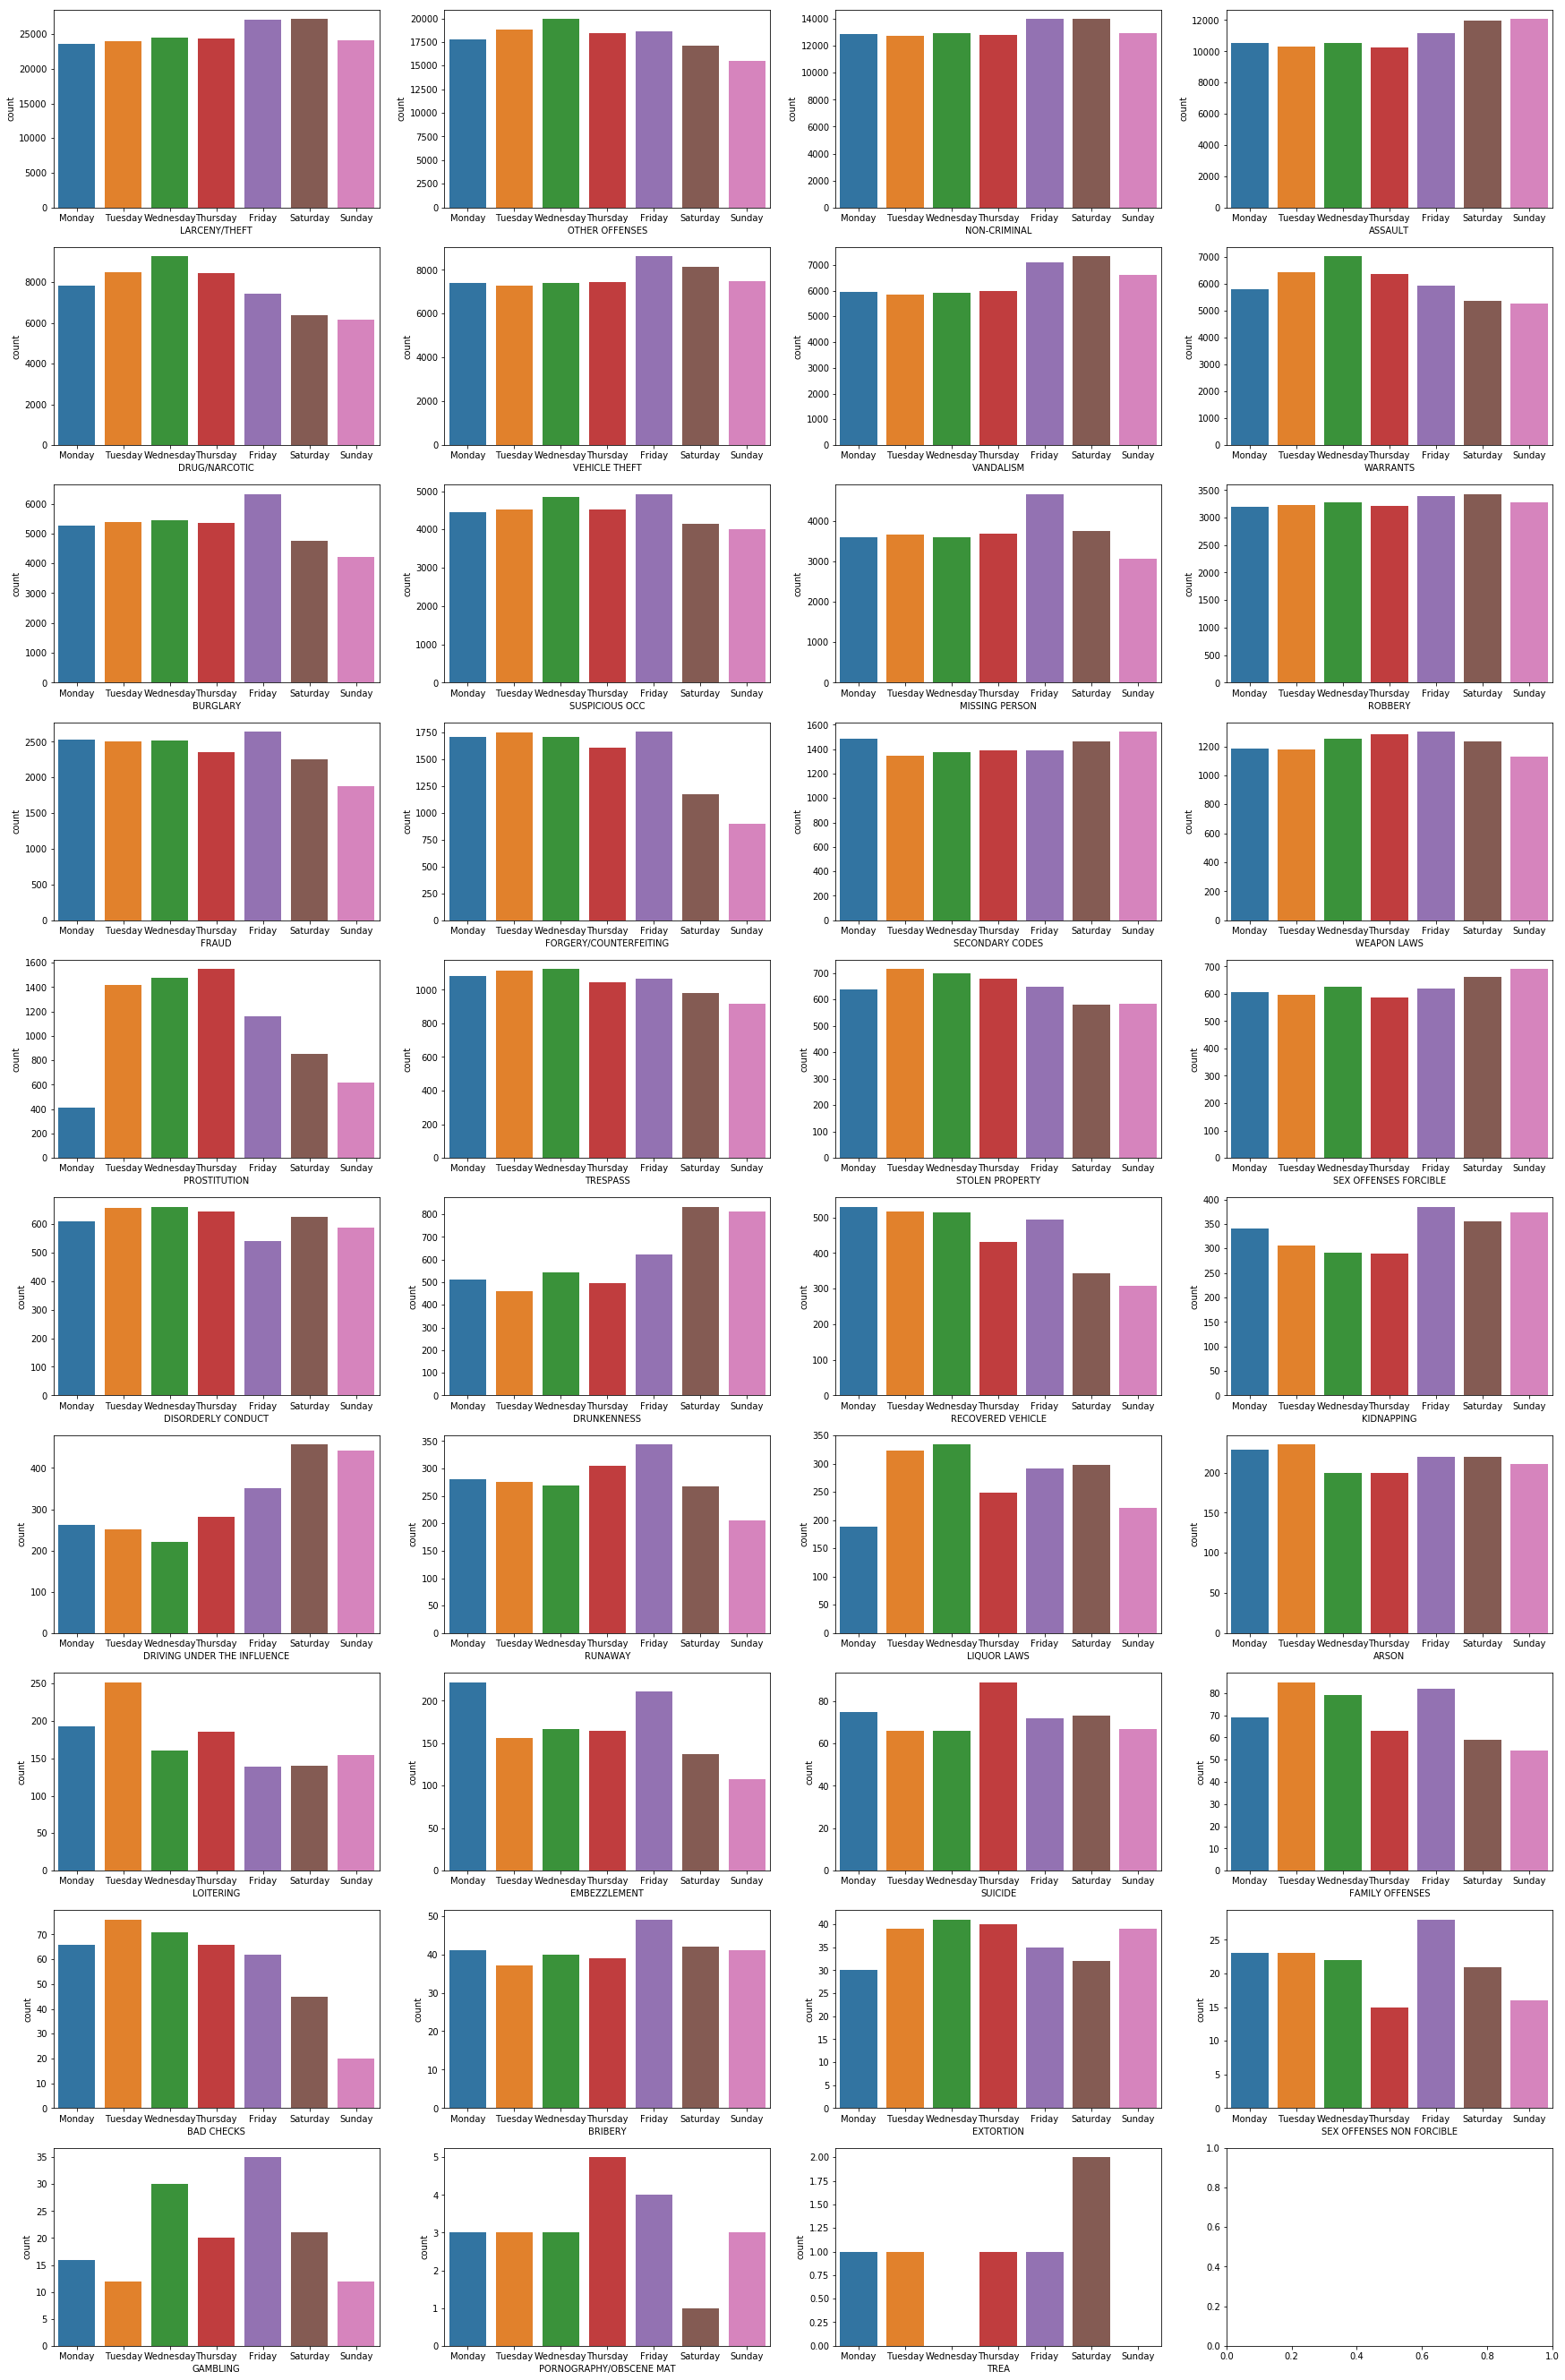

In [14]:
figure, axes = plt.subplots(nrows = 10, ncols = 4) # 차트를 여러개 띄울 때
figure.set_size_inches(30, 48) # 시각화 사이즈 조절

category_list = train["Category"].value_counts().index

for row in range(10):
    for column in range(4):
        index = row * 4 + column
        
        if index < len(category_list):
            ax = axes[row][column]
            category = category_list[index]
        
            target = train[train["Category"] == category]
            sns.countplot(data = target, x = "DayOfWeek", order = dayofweek_list, ax = ax)

            ax.set(xlabel = category)

### -PdDistrict(관할 경찰서)

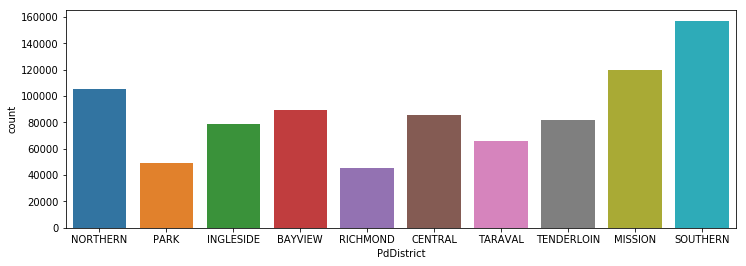

In [15]:
plt.figure(figsize = (12, 4))
sns.countplot(data = train, x = 'PdDistrict')

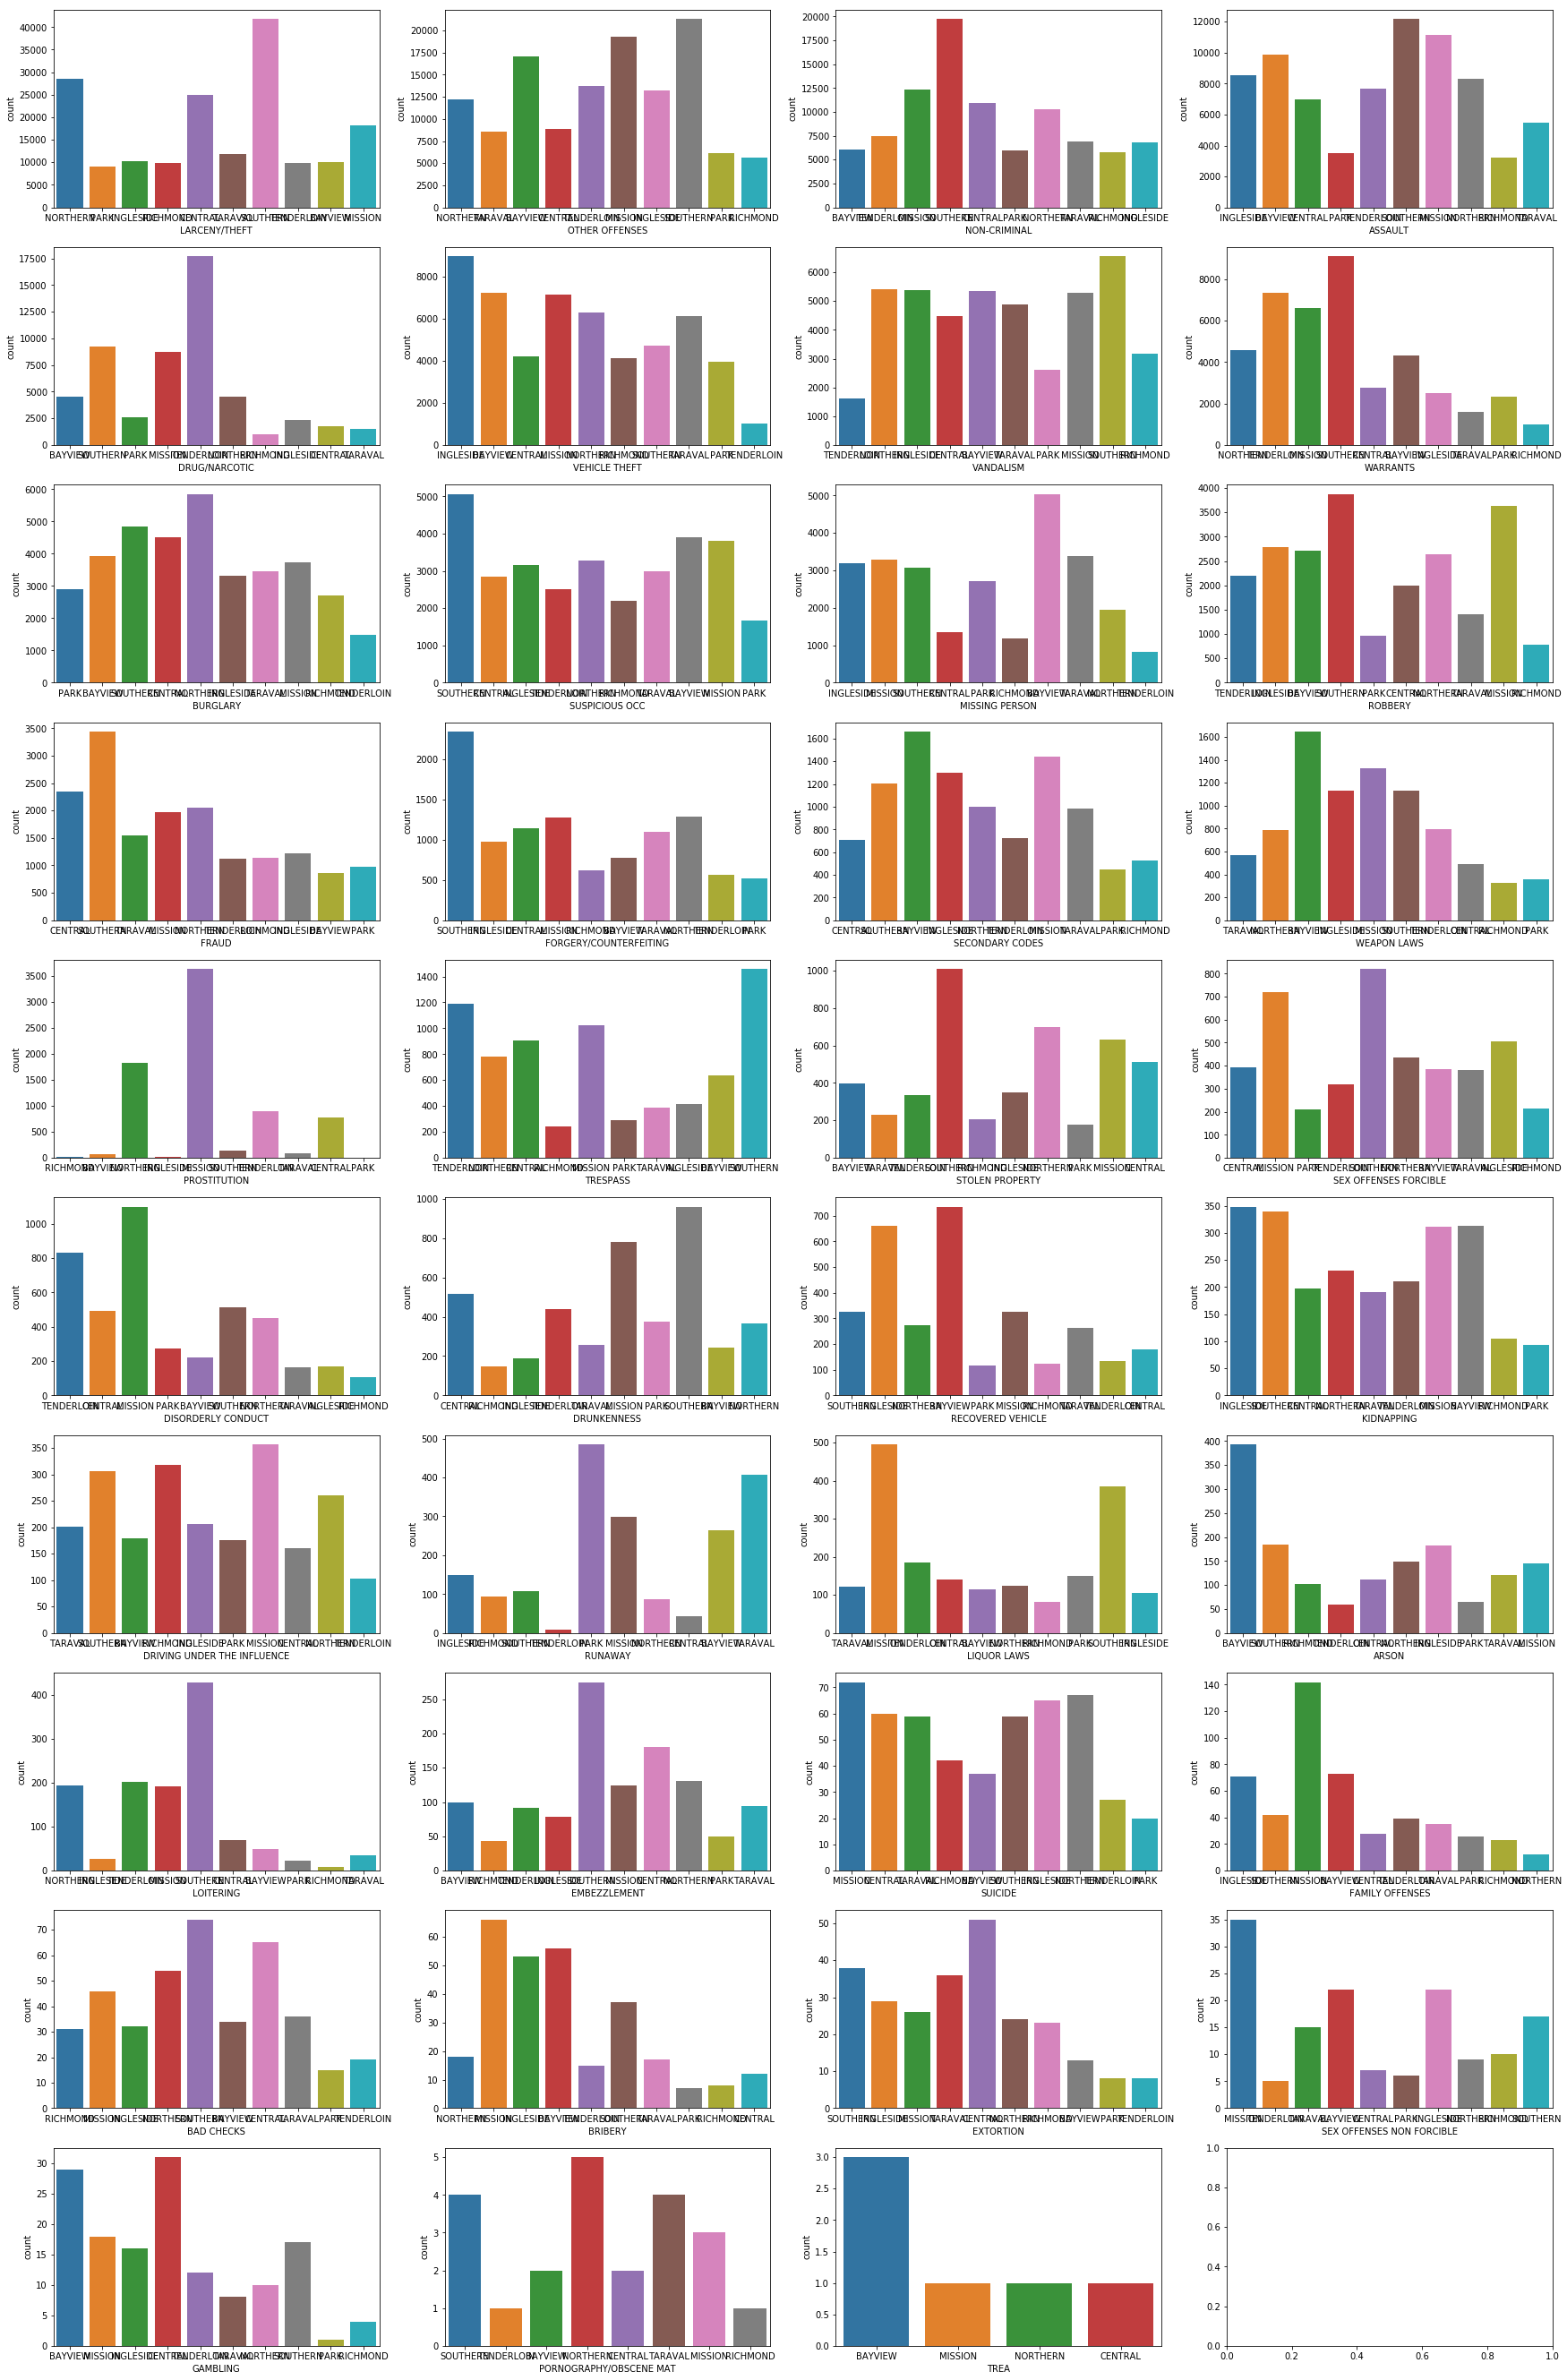

In [16]:
figure, axes = plt.subplots(nrows = 10, ncols = 4) # 차트를 여러개 띄울 때
figure.set_size_inches(30, 48) # 시각화 사이즈 조절

category_list = train["Category"].value_counts().index

for row in range(10):
    for column in range(4):
        index = row * 4 + column
        
        if index < len(category_list):
            ax = axes[row][column]
            category = category_list[index]
        
            target = train[train["Category"] == category]
            sns.countplot(data = target, x = "PdDistrict", ax = ax)

            ax.set(xlabel = category)

- 요일별로 나누는 것보다 관할 경찰서로 나누었을 때 구별되는 범죄가 많다

# 머신러닝 기본 코드 작성해보자

### -Reload Dataset

In [17]:
train = pd.read_csv("train.csv")
print(train.shape)
train.head()

(878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [18]:
test = pd.read_csv("test.csv", index_col = "Id")
print(test.shape)
test.head()

(884262, 6)


,Dates,DayOfWeek,PdDistrict,Address,X,Y
Id,,,,,,
0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


## Preprocessing
데이터를 머신러닝 알고리즘에 활용해 예측하기 위해서 데이터를 머신러닝 알고리즘이 이해할 수 있는 형태로 변환해줘야 한다. 이 과정을 전처리(Preprocessing)라고 한다.

scikit-learn에서 제공하는 머신러닝 알고리즘에 데이터를 넣을 수 있는 조건??
- 모든 데이터는 숫자(정수형, 실수형 등)로 구성되어 있어야 한다.
- 데이터에 빈 값이 없어야 한다.

### -Date
Dates 컬럼은 현제 문자열(-,:으로 표현되어 있음) 데이터타입으로 되어있기 떄문에

우선 DateTime 데이터타입으로 변경해 준다.

In [19]:
train['Dates'] = pd.to_datetime(train["Dates"])

In [20]:
train["Dates-year"] = train["Dates"].dt.year
train["Dates-month"] = train["Dates"].dt.month
train["Dates-day"] = train["Dates"].dt.day
train["Dates-hour"] = train["Dates"].dt.hour
train["Dates-minute"] = train["Dates"].dt.minute
train["Dates-second"] = train["Dates"].dt.second

In [21]:
train[["Dates", "Dates-year", "Dates-month", "Dates-day", "Dates-hour", "Dates-minute", "Dates-second"]].head()

,Dates,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
0,2015-05-13 23:53:00,2015,5,13,23,53,0
1,2015-05-13 23:53:00,2015,5,13,23,53,0
2,2015-05-13 23:33:00,2015,5,13,23,33,0
3,2015-05-13 23:30:00,2015,5,13,23,30,0
4,2015-05-13 23:30:00,2015,5,13,23,30,0


In [22]:
test["Dates"] = pd.to_datetime(test["Dates"])

In [23]:
test["Dates-year"] = test["Dates"].dt.year
test["Dates-month"] = test["Dates"].dt.month
test["Dates-day"] = test["Dates"].dt.day
test["Dates-hour"] = test["Dates"].dt.hour
test["Dates-minute"] = test["Dates"].dt.minute
test["Dates-second"] = test["Dates"].dt.second

In [24]:
test[["Dates", "Dates-year", "Dates-month", "Dates-day", "Dates-hour", "Dates-minute", "Dates-second"]].head()

,Dates,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
Id,,,,,,,
0,2015-05-10 23:59:00,2015,5,10,23,59,0
1,2015-05-10 23:51:00,2015,5,10,23,51,0
2,2015-05-10 23:50:00,2015,5,10,23,50,0
3,2015-05-10 23:45:00,2015,5,10,23,45,0
4,2015-05-10 23:45:00,2015,5,10,23,45,0


### -DayOfWeek
- One Hot Encoding

In [25]:
train['DayOfWeek_Monday'] = train["DayOfWeek"] == "Monday"
train['DayOfWeek_Tuesday'] = train["DayOfWeek"] == "Tuesday"
train['DayOfWeek_Wednesday'] = train["DayOfWeek"] == "Wednesday"
train['DayOfWeek_Thursday'] = train["DayOfWeek"] == "Thursday"
train['DayOfWeek_Friday'] = train["DayOfWeek"] == "Friday"
train['DayOfWeek_Saturday'] = train["DayOfWeek"] == "Saturday"
train['DayOfWeek_Sunday'] = train["DayOfWeek"] == "Sunday"

In [26]:
# train_dayofweek = pd.get_dummies(train['DayOfWeek'], prefix = "dayOfWeek")
# concat == concatenate
# pd.concat([train, train_dayofweek], axis = 1)
# but 중복적으로 계속 합쳐지는 단점이 있다.

In [27]:
train[['DayOfWeek_Monday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday',
      'DayOfWeek_Thursday', 'DayOfWeek_Friday', 'DayOfWeek_Saturday',
      'DayOfWeek_Sunday']].head()

,DayOfWeek_Monday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,DayOfWeek_Thursday,DayOfWeek_Friday,DayOfWeek_Saturday,DayOfWeek_Sunday
0,False,False,True,False,False,False,False
1,False,False,True,False,False,False,False
2,False,False,True,False,False,False,False
3,False,False,True,False,False,False,False
4,False,False,True,False,False,False,False


In [28]:
test['DayOfWeek_Monday'] = test["DayOfWeek"] == "Monday"
test['DayOfWeek_Tuesday'] = test["DayOfWeek"] == "Tuesday"
test['DayOfWeek_Wednesday'] = test["DayOfWeek"] == "Wednesday"
test['DayOfWeek_Thursday'] = test["DayOfWeek"] == "Thursday"
test['DayOfWeek_Friday'] = test["DayOfWeek"] == "Friday"
test['DayOfWeek_Saturday'] = test["DayOfWeek"] == "Saturday"
test['DayOfWeek_Sunday'] = test["DayOfWeek"] == "Sunday"

In [29]:
test[['DayOfWeek_Monday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday',
      'DayOfWeek_Thursday', 'DayOfWeek_Friday', 'DayOfWeek_Saturday',
      'DayOfWeek_Sunday']].head()

,DayOfWeek_Monday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,DayOfWeek_Thursday,DayOfWeek_Friday,DayOfWeek_Saturday,DayOfWeek_Sunday
Id,,,,,,,
0,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True
4,False,False,False,False,False,False,True


### -PdDistrict
- One Hot Encoding

In [30]:
train['PdDistrict_NORTHERN'] = train["PdDistrict"] == "NORTHERN"
train['PdDistrict_PARK'] = train["PdDistrict"] == "PARK"
train['PdDistrict_INGLESIDE'] = train["PdDistrict"] == "INGLESIDE"
train['PdDistrict_BAYVIEW'] = train["PdDistrict"] == "BAYVIEW"
train['PdDistrict_RICHMOND'] = train["PdDistrict"] == "RICHMOND"
train['PdDistrict_CENTRAL'] = train["PdDistrict"] == "CENTRAL"
train['PdDistrict_TARAVAL'] = train["PdDistrict"] == "TARAVAL"
train['PdDistrict_TENDERLOIN'] = train["PdDistrict"] == "TENDERLOIN"
train['PdDistrict_MISSION'] = train["PdDistrict"] == "MISSION"
train['PdDistrict_SOUTHERN'] = train["PdDistrict"] == "SOUTHERN"

In [31]:
train[['PdDistrict_NORTHERN', 'PdDistrict_PARK', 'PdDistrict_INGLESIDE',
     'PdDistrict_BAYVIEW', 'PdDistrict_RICHMOND', 'PdDistrict_CENTRAL',
     'PdDistrict_TARAVAL', 'PdDistrict_TENDERLOIN', 'PdDistrict_MISSION',
     'PdDistrict_SOUTHERN']].head()

,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_INGLESIDE,PdDistrict_BAYVIEW,PdDistrict_RICHMOND,PdDistrict_CENTRAL,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,PdDistrict_MISSION,PdDistrict_SOUTHERN
0,True,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False


In [32]:
test['PdDistrict_NORTHERN'] = test["PdDistrict"] == "NORTHERN"
test['PdDistrict_PARK'] = test["PdDistrict"] == "PARK"
test['PdDistrict_INGLESIDE'] = test["PdDistrict"] == "INGLESIDE"
test['PdDistrict_BAYVIEW'] = test["PdDistrict"] == "BAYVIEW"
test['PdDistrict_RICHMOND'] = test["PdDistrict"] == "RICHMOND"
test['PdDistrict_CENTRAL'] = test["PdDistrict"] == "CENTRAL"
test['PdDistrict_TARAVAL'] = test["PdDistrict"] == "TARAVAL"
test['PdDistrict_TENDERLOIN'] = test["PdDistrict"] == "TENDERLOIN"
test['PdDistrict_MISSION'] = test["PdDistrict"] == "MISSION"
test['PdDistrict_SOUTHERN'] = test["PdDistrict"] == "SOUTHERN"

In [33]:
test[['PdDistrict_NORTHERN', 'PdDistrict_PARK', 'PdDistrict_INGLESIDE',
     'PdDistrict_BAYVIEW', 'PdDistrict_RICHMOND', 'PdDistrict_CENTRAL',
     'PdDistrict_TARAVAL', 'PdDistrict_TENDERLOIN', 'PdDistrict_MISSION',
     'PdDistrict_SOUTHERN']].head()

,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_INGLESIDE,PdDistrict_BAYVIEW,PdDistrict_RICHMOND,PdDistrict_CENTRAL,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,PdDistrict_MISSION,PdDistrict_SOUTHERN
Id,,,,,,,,,,
0,False,False,False,True,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False


### -Address

In [34]:
train['Address']

0                    OAK ST / LAGUNA ST
1                    OAK ST / LAGUNA ST
2             VANNESS AV / GREENWICH ST
3              1500 Block of LOMBARD ST
4             100 Block of BRODERICK ST
5                   0 Block of TEDDY AV
6                   AVALON AV / PERU AV
7              KIRKWOOD AV / DONAHUE ST
8                  600 Block of 47TH AV
9         JEFFERSON ST / LEAVENWORTH ST
10        JEFFERSON ST / LEAVENWORTH ST
11                0 Block of ESCOLTA WY
12                   TURK ST / JONES ST
13               FILLMORE ST / GEARY BL
14             200 Block of WILLIAMS AV
15                0 Block of MENDELL ST
16                   EDDY ST / JONES ST
17               GODEUS ST / MISSION ST
18               MENDELL ST / HUDSON AV
19                100 Block of JONES ST
20               200 Block of EVELYN WY
21            1600 Block of VALENCIA ST
22                100 Block of JONES ST
23                100 Block of JONES ST
24             FILLMORE ST / LOMBARD ST


In [35]:
# 교차점 ST, 특정 블록 Block, AV 에비뉴
train['Crossroad'] = train['Address'].str.contains("/")
print(train.shape)
train[['Address', 'Crossroad']].head()

(878049, 33)


,Address,Crossroad
0,OAK ST / LAGUNA ST,True
1,OAK ST / LAGUNA ST,True
2,VANNESS AV / GREENWICH ST,True
3,1500 Block of LOMBARD ST,False
4,100 Block of BRODERICK ST,False


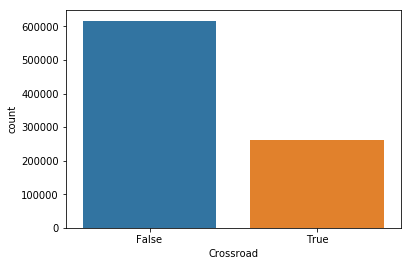

In [36]:
sns.countplot(data=train, x='Crossroad')

- 교차점? 블록? 어떤 범죄가 많이 일어날까?

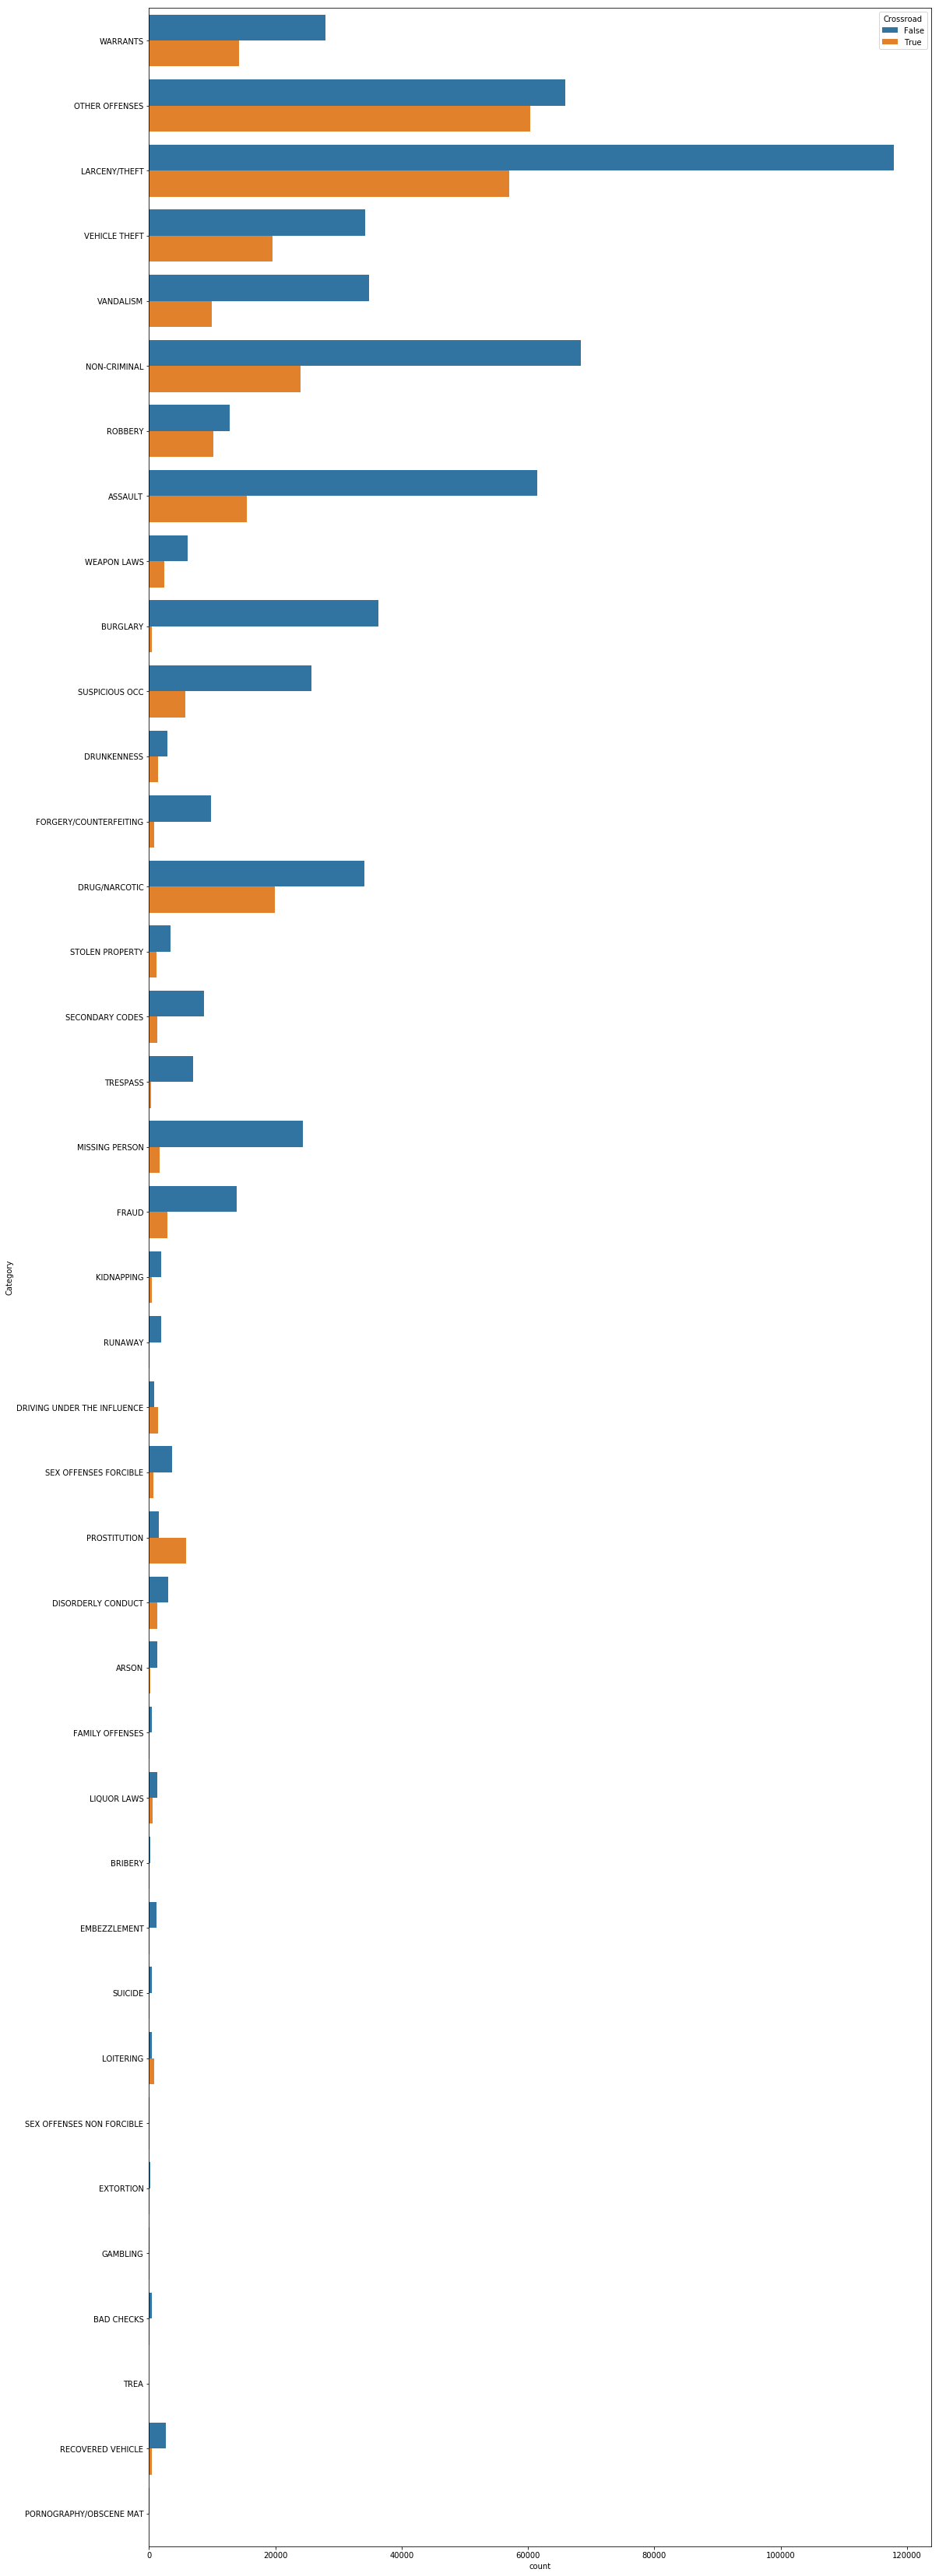

In [37]:
plt.figure(figsize = (18, 60))
sns.countplot(data=train, hue='Crossroad', y='Category')

In [38]:
train[train['Address'] == 'OAK ST / LAGUNA ST']
# 45 rows

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,...,PdDistrict_PARK,PdDistrict_INGLESIDE,PdDistrict_BAYVIEW,PdDistrict_RICHMOND,PdDistrict_CENTRAL,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,PdDistrict_MISSION,PdDistrict_SOUTHERN,Crossroad
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,False,False,False,False,False,False,False,False,False,True
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,False,False,False,False,False,False,False,False,False,True
12956,2015-03-08 08:50:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Sunday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,False,False,False,False,False,False,False,False,False,True
27204,2015-01-05 20:00:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Monday,NORTHERN,NONE,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,False,False,False,False,False,False,False,False,False,True
65580,2014-06-29 17:12:00,DRUG/NARCOTIC,POSSESSION OF MARIJUANA,Sunday,NORTHERN,"ARREST, CITED",OAK ST / LAGUNA ST,-122.425892,37.774599,2014,...,False,False,False,False,False,False,False,False,False,True
65581,2014-06-29 17:12:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Sunday,NORTHERN,"ARREST, CITED",OAK ST / LAGUNA ST,-122.425892,37.774599,2014,...,False,False,False,False,False,False,False,False,False,True
86826,2014-03-19 18:00:00,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,OAK ST / LAGUNA ST,-122.425892,37.774599,2014,...,False,False,False,False,False,False,False,False,False,True
87920,2014-03-17 06:25:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Monday,NORTHERN,NONE,OAK ST / LAGUNA ST,-122.425892,37.774599,2014,...,False,False,False,False,False,False,False,False,False,True
91020,2014-02-23 18:03:00,OTHER OFFENSES,FALSE EVIDENCE OF VEHICLE REGISTRATION,Sunday,NORTHERN,"ARREST, CITED",OAK ST / LAGUNA ST,-122.425892,37.774599,2014,...,False,False,False,False,False,False,False,False,False,True
91021,2014-02-23 18:03:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Sunday,NORTHERN,"ARREST, CITED",OAK ST / LAGUNA ST,-122.425892,37.774599,2014,...,False,False,False,False,False,False,False,False,False,True


In [39]:
train[train['Address'] == 'LAGUNA ST / OAK ST']
#27 rows

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,...,PdDistrict_PARK,PdDistrict_INGLESIDE,PdDistrict_BAYVIEW,PdDistrict_RICHMOND,PdDistrict_CENTRAL,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,PdDistrict_MISSION,PdDistrict_SOUTHERN,Crossroad
106008,2013-12-11 16:55:00,OTHER OFFENSES,TRAFFIC VIOLATION,Wednesday,NORTHERN,"ARREST, CITED",LAGUNA ST / OAK ST,-122.425892,37.774599,2013,...,False,False,False,False,False,False,False,False,False,True
154395,2013-04-30 11:00:00,VEHICLE THEFT,STOLEN MOTORCYCLE,Tuesday,NORTHERN,NONE,LAGUNA ST / OAK ST,-122.425892,37.774599,2013,...,False,False,False,False,False,False,False,False,False,True
219632,2012-06-03 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,NORTHERN,NONE,LAGUNA ST / OAK ST,-122.425892,37.774599,2012,...,False,False,False,False,False,False,False,False,False,True
283267,2011-07-01 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Friday,NORTHERN,NONE,LAGUNA ST / OAK ST,-122.425892,37.774599,2011,...,False,False,False,False,False,False,False,False,False,True
314544,2011-01-12 09:15:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Wednesday,NORTHERN,"ARREST, CITED",LAGUNA ST / OAK ST,-122.425892,37.774599,2011,...,False,False,False,False,False,False,False,False,False,True
391382,2009-11-11 20:00:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,NORTHERN,NONE,LAGUNA ST / OAK ST,-122.425892,37.774599,2009,...,False,False,False,False,False,False,False,False,False,True
404322,2009-09-05 15:00:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Saturday,NORTHERN,NONE,LAGUNA ST / OAK ST,-122.425892,37.774599,2009,...,False,False,False,False,False,False,False,False,False,True
415147,2009-07-12 15:00:00,NON-CRIMINAL,LOST PROPERTY,Sunday,NORTHERN,NONE,LAGUNA ST / OAK ST,-122.425892,37.774599,2009,...,False,False,False,False,False,False,False,False,False,True
441736,2009-02-21 21:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Saturday,NORTHERN,NONE,LAGUNA ST / OAK ST,-122.425892,37.774599,2009,...,False,False,False,False,False,False,False,False,False,True
448532,2009-01-20 15:55:00,OTHER OFFENSES,TRAFFIC VIOLATION,Tuesday,NORTHERN,"ARREST, CITED",LAGUNA ST / OAK ST,-122.425892,37.774599,2009,...,False,False,False,False,False,False,False,False,False,True


- 'LAGUNA ST / OAK ST' = 'OAK ST / LAGUNA ST' 처럼 같은 주소이지만 다르게 표현한 데이터가 존재한다.
- 하나의 주소로 변경해보자

In [40]:
def clean_address(address):
    if '/' not in address:
        return address
    
    address1, address2 = address.split('/')
    address1, address2 = address1.strip(), address2.strip()
    
    if address1 < address2:
        address = "{} / {}".format(address1, address2)
    else:
        address = "{} / {}".format(address2, address1)
    return address

In [41]:
train['Address(clean)'] = train['Address'].apply(clean_address)
len(train['Address'].unique()), len(train['Address(clean)'].unique())

(23228, 17812)

In [42]:
test['Address(clean)'] = test['Address'].apply(clean_address)
len(test['Address'].unique()), len(test['Address(clean)'].unique())

(23184, 17772)

In [43]:
address_counts = train['Address(clean)'].value_counts()
top_address_counts = address_counts[address_counts >= 100]
top_address_counts = top_address_counts.index
top_address_counts

Index(['800 Block of BRYANT ST', '800 Block of MARKET ST',
       '2000 Block of MISSION ST', '1000 Block of POTRERO AV',
       '16TH ST / MISSION ST', '900 Block of MARKET ST', '0 Block of TURK ST',
       '0 Block of 6TH ST', '300 Block of ELLIS ST', '400 Block of ELLIS ST',
       ...
       '0 Block of ZOO RD', '22ND ST / 3RD ST', '0 Block of LAGUNA ST',
       '1800 Block of CHESTNUT ST', '1800 Block of IRVING ST',
       '900 Block of POLK ST', '600 Block of ALABAMA ST',
       '300 Block of ALEMANY BL', '1800 Block of SUTTER ST',
       '300 Block of BUCHANAN ST'],
      dtype='object', length=1719)

In [44]:
train.loc[~train['Address(clean)'].isin(top_address_counts), "Address(clean)"] = 'Others'

In [45]:
test.loc[~test['Address(clean)'].isin(top_address_counts), "Address(clean)"] = 'Others'

In [46]:
len(train['Address'].unique()), len(train['Address(clean)'].unique())

(23228, 1720)

In [47]:
len(test['Address'].unique()), len(test['Address(clean)'].unique())

(23184, 1720)

In [48]:
train_address = pd.get_dummies(train['Address(clean)'])
print(train_address.shape)
train_address.head()

(878049, 1720)


,0 Block of 12TH ST,0 Block of 1ST ST,0 Block of 2ND ST,0 Block of 3RD ST,0 Block of 4TH ST,0 Block of 5TH ST,0 Block of 5THSTNORTH ST,0 Block of 6TH ST,0 Block of 7TH ST,0 Block of 8TH ST,...,SANTOS ST / SUNNYDALE AV,STANYAN ST / WALLER ST,STOCKTON ST / SUTTER ST,STOCKTON ST / WASHINGTON ST,SUTTER ST / TAYLOR ST,SUTTER ST / VANNESS AV,TAYLOR ST / TURK ST,THE EMBARCADERONORTH ST / WASHINGTON ST,TURK ST / VANNESS AV,TURK ST / WEBSTER ST
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
test_address = pd.get_dummies(test['Address(clean)'])
print(test_address.shape)
test_address.head()

(884262, 1720)


,0 Block of 12TH ST,0 Block of 1ST ST,0 Block of 2ND ST,0 Block of 3RD ST,0 Block of 4TH ST,0 Block of 5TH ST,0 Block of 5THSTNORTH ST,0 Block of 6TH ST,0 Block of 7TH ST,0 Block of 8TH ST,...,SANTOS ST / SUNNYDALE AV,STANYAN ST / WALLER ST,STOCKTON ST / SUTTER ST,STOCKTON ST / WASHINGTON ST,SUTTER ST / TAYLOR ST,SUTTER ST / VANNESS AV,TAYLOR ST / TURK ST,THE EMBARCADERONORTH ST / WASHINGTON ST,TURK ST / VANNESS AV,TURK ST / WEBSTER ST
Id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- 데이터 양이 많아서 메모리 에러 -> 효율적인 메모리 사용을 위해 CSR Matrix를 사용해본다.

In [50]:
from scipy.sparse import csr_matrix

train_address = csr_matrix(train_address)
train_address

<878049x1720 sparse matrix of type '<class 'numpy.uint8'>'
	with 878049 stored elements in Compressed Sparse Row format>

In [51]:
test_address = csr_matrix(test_address)
test_address

<884262x1720 sparse matrix of type '<class 'numpy.uint8'>'
	with 884262 stored elements in Compressed Sparse Row format>

### -train

In [52]:
feature_names = ['X', 'Y',
                "Dates-year", "Dates-month", "Dates-day",
                "Dates-hour", "Dates-minute", "Dates-second",
                'PdDistrict_NORTHERN', 'PdDistrict_PARK', 'PdDistrict_INGLESIDE',
                'PdDistrict_BAYVIEW', 'PdDistrict_RICHMOND', 'PdDistrict_CENTRAL',
                'PdDistrict_TARAVAL', 'PdDistrict_TENDERLOIN', 'PdDistrict_MISSION',
                'PdDistrict_SOUTHERN',
                'DayOfWeek_Monday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday',
                'DayOfWeek_Thursday', 'DayOfWeek_Friday', 'DayOfWeek_Saturday',
                'DayOfWeek_Sunday']

In [53]:
x_train = train[feature_names]
print(x_train.shape)
x_train.head()

(878049, 25)


,X,Y,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second,PdDistrict_NORTHERN,PdDistrict_PARK,...,PdDistrict_TENDERLOIN,PdDistrict_MISSION,PdDistrict_SOUTHERN,DayOfWeek_Monday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,DayOfWeek_Thursday,DayOfWeek_Friday,DayOfWeek_Saturday,DayOfWeek_Sunday
0,-122.425892,37.774599,2015,5,13,23,53,0,True,False,...,False,False,False,False,False,True,False,False,False,False
1,-122.425892,37.774599,2015,5,13,23,53,0,True,False,...,False,False,False,False,False,True,False,False,False,False
2,-122.424363,37.800414,2015,5,13,23,33,0,True,False,...,False,False,False,False,False,True,False,False,False,False
3,-122.426995,37.800873,2015,5,13,23,30,0,True,False,...,False,False,False,False,False,True,False,False,False,False
4,-122.438738,37.771541,2015,5,13,23,30,0,False,True,...,False,False,False,False,False,True,False,False,False,False


In [121]:
#x_train = pd.concat([x_train, train_address], axis=1)
#print(x_train.shape)
#x_train.head()

In [54]:
from scipy.sparse import hstack

In [55]:
x_train = hstack([x_train.astype("float"), train_address])
x_train

<878049x1745 sparse matrix of type '<class 'numpy.float64'>'
	with 8466675 stored elements in COOrdinate format>

In [57]:
x_test = test[feature_names]
print(x_test.shape)
x_test.head()

(884262, 25)


,X,Y,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second,PdDistrict_NORTHERN,PdDistrict_PARK,...,PdDistrict_TENDERLOIN,PdDistrict_MISSION,PdDistrict_SOUTHERN,DayOfWeek_Monday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,DayOfWeek_Thursday,DayOfWeek_Friday,DayOfWeek_Saturday,DayOfWeek_Sunday
Id,,,,,,,,,,,,,,,,,,,,,
0,-122.399588,37.735051,2015,5,10,23,59,0,False,False,...,False,False,False,False,False,False,False,False,False,True
1,-122.391523,37.732432,2015,5,10,23,51,0,False,False,...,False,False,False,False,False,False,False,False,False,True
2,-122.426002,37.792212,2015,5,10,23,50,0,True,False,...,False,False,False,False,False,False,False,False,False,True
3,-122.437394,37.721412,2015,5,10,23,45,0,False,False,...,False,False,False,False,False,False,False,False,False,True
4,-122.437394,37.721412,2015,5,10,23,45,0,False,False,...,False,False,False,False,False,False,False,False,False,True


In [58]:
#x_test = pd.concat([x_test, test_address], axis=1)
#print(x_test.shape)
#x_test.head()

In [59]:
x_test = hstack([x_test.astype("float"), test_address])
x_test

<884262x1745 sparse matrix of type '<class 'numpy.float64'>'
	with 8524842 stored elements in COOrdinate format>

In [60]:
label_name = 'Category'

In [61]:
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(878049,)


0          WARRANTS
1    OTHER OFFENSES
2    OTHER OFFENSES
3     LARCENY/THEFT
4     LARCENY/THEFT
Name: Category, dtype: object

### -Use Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_RandomForest = RandomForestClassifier(n_estimators = 7,
                              n_jobs = -1,
                              random_state = 37)
# n_estimators = 트리의 개수
# n_jobs = 병렬처리, 활용할 코어 개수
# random_state = 랜덤포레스트는 랜덤하게 트리를 만들기 때문에 결과가 항상 바뀌는 것을 예방
model_RandomForest

### -Use Gradient Boosting Machine(LightGBM)

In [62]:
from lightgbm import LGBMClassifier

model_LGBM = LGBMClassifier(n_estimators = 10,
                           random_state = 37)

model_LGBM

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=10, n_jobs=-1, num_leaves=31, objective=None,
        random_state=37, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## Model Validation
가설 -> 검증 -> 예측

1.Hold-out Validation

-  train 데이터의 일부분을 fit 하고 나머지 부분을 예측해보는 검증 방법

2.Cross Validation

- train 데이터를 1/n로 나눠 한 부분을 제외한 나머지 부분으로 예측해보는 검증 방법

### -Evaluate

In [63]:
# scikit-learn의 model_selection 모듈에서 train_test_split 함수를 가져옵니다.
# 이 함수는 데이터를 일정 비율로 두 개로 쪼개는 역할을 담당합니다.
from sklearn.model_selection import train_test_split

# train 데이터를 두 개로 쪼갭니다. 쪼개는 비율은 7:3으로 할 것이며
# 7의 부분이 X_train_kf와 y_train_kf로 들어가고, 3의 부분이 X_test_kf와 y_test_kf로 들어갑니다.
# 실행할때마다 매 번 동일한 결과가 나오도록 하기 위해 random_state 옵션을 줘서 seed를 고정시킵니다.
x_train_kf, x_test_kf, y_train_kf, y_test_kf = \
    train_test_split(x_train, y_train, test_size = 0.3, random_state = 37)

# X_train_kf와 y_train_kf 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(x_train_kf.shape, y_train_kf.shape)

# X_test_kf와 y_test_kf 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(x_test_kf.shape, y_test_kf.shape)

(614634, 1745) (614634,)
(263415, 1745) (263415,)


In [64]:
# 머신러닝 모델을 학습(fitting)합니다.
# 학습에는 fit 이라는 기능을 사용하며, train 데이터의 feature(X_train)와 label(y_train)을 집어넣습니다.
# 추가로 %time 옵션을 왼쪽에 넣으면 실행 시간을 측정할 수 있습니다.
%time model_LGBM.fit(x_train_kf, y_train_kf)

Wall time: 25.4 s


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=10, n_jobs=-1, num_leaves=31, objective=None,
        random_state=37, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [65]:
# fit이 끝났으면, predict_proba를 통해 각 범죄가 발생할 확률(probability)를 구합니다.
# predict가 아닌 predict_proba를 사용하는 이유는, 아래서 사용할 log loss 공식에서 확률을 이용하기 때문입니다.
# 이 결과를 y_predict_test_kf라는 이름의 변수에 할당합니다.
y_predict_test_kf = model_LGBM.predict_proba(x_test_kf)

# y_predict_test_kf 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(y_predict_test_kf.shape)

# y_predict_test_kf를 화면에 출력합니다.
y_predict_test_kf

(263415, 39)


array([[ 0.001548  ,  0.08893549,  0.00033367, ...,  0.04026212,
         0.06101749,  0.01009518],
       [ 0.00150048,  0.06769884,  0.00041747, ...,  0.09040268,
         0.03204576,  0.00714785],
       [ 0.00156823,  0.09963624,  0.00037504, ...,  0.04761827,
         0.05170493,  0.01165965],
       ..., 
       [ 0.00176531,  0.09714331,  0.00034899, ...,  0.11205058,
         0.03437276,  0.0073693 ],
       [ 0.00229511,  0.07923477,  0.000931  , ...,  0.05051329,
         0.0337726 ,  0.00859778],
       [ 0.00151667,  0.08727126,  0.00039524, ...,  0.05398709,
         0.06438176,  0.01083463]])

### -log loss

In [66]:
# scikit-learn의 측정 공식(metrics) 모듈에서 log_loss 함수를 가져옵니다.
from sklearn.metrics import log_loss

# log loss를 계산합니다. 정답(y, y_test_kf)과 예측값의 확률(p, y_predict_test_kf)을 데이터로 집어넣으면
# log lsos의 계산 결과가 나옵니다. 이를 score라는 변수에 할당합니다.
score = log_loss(y_test_kf, y_predict_test_kf)

# score 변수에 할당한 점수를 출력합니다.
print(f"Score = {score:.5f}")

Score = 2.63708


### -Predict
Hold Out Validation(+log loss)을 통해 점수를 확인하고

머신러닝 모델을 학습

In [67]:
%time model_LGBM.fit(x_train, y_train)

Wall time: 35.2 s


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=10, n_jobs=-1, num_leaves=31, objective=None,
        random_state=37, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [68]:
prediction = model_LGBM.predict(x_test)
print(prediction.shape)
prediction

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:469: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')


(884262,)


array(['OTHER OFFENSES', 'OTHER OFFENSES', 'LARCENY/THEFT', ...,
       'LARCENY/THEFT', 'LARCENY/THEFT', 'LARCENY/THEFT'], dtype=object)

!! 이번 경진 대회는 범죄 종류를 맞추는 것이 아니라 확률을 구해야하기 때문에 predict_proba를 사용한다.

In [69]:
prediction_list = model_LGBM.predict_proba(x_test)
print(prediction_list.shape)
prediction_list

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:469: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')


(884262, 39)


array([[ 0.00222534,  0.10008857,  0.00032443, ...,  0.04676311,
         0.05490107,  0.01382252],
       [ 0.0021769 ,  0.10071674,  0.00025676, ...,  0.0396581 ,
         0.06704029,  0.01485043],
       [ 0.00140585,  0.08789231,  0.00031763, ...,  0.04578183,
         0.04755605,  0.00934884],
       ..., 
       [ 0.00163627,  0.08064637,  0.00062028, ...,  0.04990445,
         0.03601082,  0.00985453],
       [ 0.00178282,  0.07268058,  0.00124739, ...,  0.08752651,
         0.03140275,  0.00850327],
       [ 0.00167258,  0.0784474 ,  0.00063405, ...,  0.05101168,
         0.0368098 ,  0.00929469]])

### -Submit

In [70]:
# 캐글이 제공하는 제출 포멧(sampleSubmission.csv)을 읽어옵니다.
# 이를 sample_submission 이라는 이름의 변수에 할당합니다.
sample_submission = pd.read_csv("sampleSubmission.csv", index_col = "Id")

# 예측값(prediction_list), 제출 포멧(sample_submission), 그리고 예측모델의 결과(model)를 활용해
# 제출본(submission)을 만듭니다. prediction_list를 판다스 DataFrame으로 바꾸되,
# 이 데이터프레임의 인덱스(Index)는 제출 포멧(sample_submission)으로,
# 컬럼(columns)은 예측모델(model)이 학습한 클래스를 사용합니다.
submission = pd.DataFrame(prediction_list,
                          index = sample_submission.index,
                          columns = model_LGBM.classes_)

# submission 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(submission.shape)

# submission 데이터의 상위 5개를 띄웁니다.
submission.head()

(884262, 39)


,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
Id,,,,,,,,,,,,,,,,,,,,,
0,0.002225,0.100089,0.000324,0.000359,0.034949,0.004114,0.004050,0.057563,0.004798,0.000972,...,0.000142,0.006132,0.000626,0.039964,0.000004,0.007949,0.053055,0.046763,0.054901,0.013823
1,0.002177,0.100717,0.000257,0.000282,0.032059,0.004024,0.003662,0.074721,0.004941,0.000951,...,0.000132,0.005999,0.000460,0.039094,0.000004,0.007776,0.046743,0.039658,0.067040,0.014850
2,0.001406,0.087892,0.000318,0.000254,0.044712,0.004028,0.005573,0.044667,0.005967,0.000952,...,0.000139,0.006716,0.000613,0.035154,0.000004,0.007442,0.051941,0.045782,0.047556,0.009349
3,0.002083,0.098855,0.000343,0.000282,0.035295,0.004168,0.004849,0.057574,0.005117,0.000985,...,0.000137,0.006212,0.000477,0.040485,0.000004,0.007671,0.053001,0.041069,0.049170,0.012357
4,0.002083,0.098855,0.000343,0.000282,0.035295,0.004168,0.004849,0.057574,0.005117,0.000985,...,0.000137,0.006212,0.000477,0.040485,0.000004,0.007671,0.053001,0.041069,0.049170,0.012357


In [71]:
submission.to_csv("sf-crime-2.63708.csv")